In [ ]:
#Gaussian process regression can also be applied to optimisation. An algorithm is described that uses model comparison between multiple models to find the optimum of a function while taking as few samples as possible.

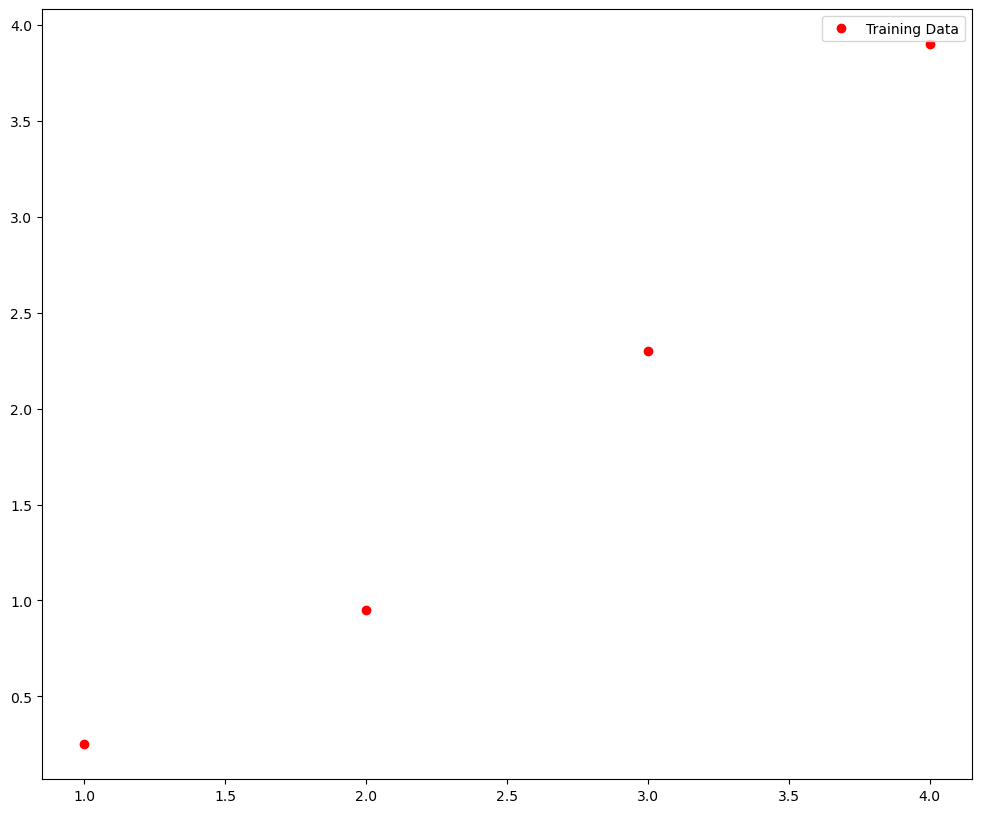

---------- Matrix KB ----------
[[2.005 1.213 0.271 0.022]
 [1.213 2.005 1.213 0.271]
 [0.271 1.213 2.005 1.213]
 [0.022 0.271 1.213 2.005]]
---------- Inverse of Matrix KB ----------
[[ 0.953 -0.862  0.519 -0.208]
 [-0.862  1.688 -1.219  0.519]
 [ 0.519 -1.219  1.688 -0.862]
 [-0.208  0.519 -0.862  0.953]]
---------- Matrix Ks ----------
[[1.21306 0.27067 0.02222 0.00067]
 [1.4523  0.3958  0.03968 0.00146]
 [1.67054 0.55607 0.06809 0.00307]
 [1.84623 0.75062 0.11227 0.00618]
 [1.9604  0.9735  0.17784 0.01195]
 [2.      1.21306 0.27067 0.02222]
 [1.9604  1.4523  0.3958  0.03968]
 [1.84623 1.67054 0.55607 0.06809]
 [1.67054 1.84623 0.75062 0.11227]
 [1.4523  1.9604  0.9735  0.17784]
 [1.21306 2.      1.21306 0.27067]
 [0.9735  1.9604  1.4523  0.3958 ]
 [0.75062 1.84623 1.67054 0.55607]
 [0.55607 1.67054 1.84623 0.75062]
 [0.3958  1.4523  1.9604  0.9735 ]
 [0.27067 1.21306 2.      1.21306]
 [0.17784 0.9735  1.9604  1.4523 ]
 [0.11227 0.75062 1.84623 1.67054]
 [0.06809 0.55607 1.67054 1.8

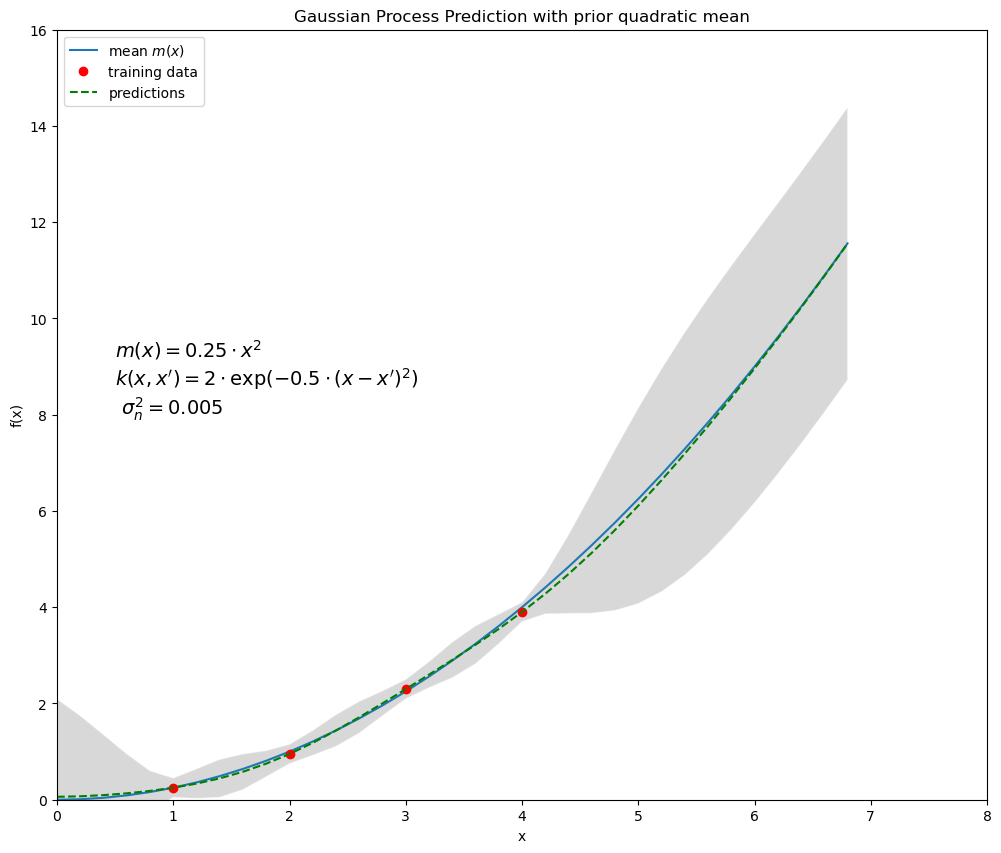

In [1]:
import numpy as np
from scipy import r_
from matplotlib import pyplot as plt
np.set_printoptions(precision=5,suppress=True)

#Gaussian Process for Regression
xB=np.array([1,2,3,4])
yB=np.array([0.25,0.95,2.3,3.9])
plt.figure(figsize=(12, 10))
plt.plot(xB,yB,"or",label="Training Data")
plt.legend()#legend is area describe elements of graph
plt.show()

xPred=np.arange(0,7,0.2)#creates an instance of ndarray with evenly spaced values and return the reference to it

#Define the hyperparameters for the mean- and covariance function

c2=0.25 # constant coefficient of quadratic term in prior mean function
ell=1 # horizontal length scale parameter in the squared exponential function
sigmaF2=2 #sigmaF2 is the variance of the multivariate gaussian dis
SigmaN2=0.005  #sigmaN2 is the variance of the regression noise-term

#Definition of mean- and covariance function. Here, the mean function is a quadratic polynomial and the covariance function is the squared exponential.
def priormean(xin):
    return c2*xin**2

def corrFunc(xa,xb):
    return sigmaF2*np.exp(-((xa-xb)**2)/(2.0*ell**2))

#Calculate the values mx of the mean function in the range from 0 to 7. These values are just used for plotting. The values mxB are the mean-function values at the training data x-values, i.e. the mean-vector. These values are applied for calculating the prediction.
mx=priormean(xPred)
mxB=priormean(xB)

#Calculate the covariance matrix by evaluating the covariance function at the training data x-values.
KB=np.zeros((len(xB),len(xB)))
for i in range(len(xB)):
    for j in range(i,len(xB)):
        noise=(SigmaN2 if i==j else 0)
        k=corrFunc(xB[i],xB[j])+noise
        KB[i][j]=k
        KB[j][i]=k        
print('-'*10+' Matrix KB '+'-'*10)
print(KB.round(decimals=3))
#---------- Matrix KB ----------
#[[2.005 1.213 0.271 0.022]
 #[1.213 2.005 1.213 0.271]
 #[0.271 1.213 2.005 1.213]
 #[0.022 0.271 1.213 2.005]]

#Calculate the inverse of the covariance matrix
KBInv=np.linalg.inv(KB)
print('-'*10+' Inverse of Matrix KB '+'-'*10)
print(KBInv.round(decimals=3))
#---------- Inverse of Matrix KB ----------
#[[ 0.953 -0.862  0.519 -0.208]
# [-0.862  1.688 -1.219  0.519]
#[ 0.519 -1.219  1.688 -0.862]
 #[-0.208  0.519 -0.862  0.953]]

#Calculate the covariance matrix K* between training x-values and prediction x-values
Ks=np.zeros((len(xPred),len(xB)))
for i in range(len(xPred)):
    for j in range(len(xB)):
        k=corrFunc(xPred[i],xB[j])
        Ks[i][j]=k
print('-'*10+' Matrix Ks '+'-'*10)
print(Ks.round(decimals=5))

"""--------- Matrix Ks ----------
[[1.21306 0.27067 0.02222 0.00067]
 [1.4523  0.3958  0.03968 0.00146]
 [1.67054 0.55607 0.06809 0.00307]
 [1.84623 0.75062 0.11227 0.00618]
 [1.9604  0.9735  0.17784 0.01195]
 [2.      1.21306 0.27067 0.02222]
 [1.9604  1.4523  0.3958  0.03968]
 [1.84623 1.67054 0.55607 0.06809]
 [1.67054 1.84623 0.75062 0.11227]
 [1.4523  1.9604  0.9735  0.17784]
 [1.21306 2.      1.21306 0.27067]
 [0.9735  1.9604  1.4523  0.3958 ]
 [0.75062 1.84623 1.67054 0.55607]
 [0.55607 1.67054 1.84623 0.75062]
 [0.3958  1.4523  1.9604  0.9735 ]
 [0.27067 1.21306 2.      1.21306]
 [0.17784 0.9735  1.9604  1.4523 ]
 [0.11227 0.75062 1.84623 1.67054]
 [0.06809 0.55607 1.67054 1.84623]
 [0.03968 0.3958  1.4523  1.9604 ]
 [0.02222 0.27067 1.21306 2.     ]
 [0.01195 0.17784 0.9735  1.9604 ]
 [0.00618 0.11227 0.75062 1.84623]
 [0.00307 0.06809 0.55607 1.67054]
 [0.00146 0.03968 0.3958  1.4523 ]
 [0.00067 0.02222 0.27067 1.21306]
 [0.0003  0.01195 0.17784 0.9735 ]
 [0.00013 0.00618 0.11227 0.75062]
 [0.00005 0.00307 0.06809 0.55607]
 [0.00002 0.00146 0.03968 0.3958 ]
 [0.00001 0.00067 0.02222 0.27067]
 [0.      0.0003  0.01195 0.17784]
 [0.      0.00013 0.00618 0.11227]
 [0.      0.00005 0.00307 0.06809]
 [0.      0.00002 0.00146 0.03968]]"""

#Calculate the covariance matrix K** between prediction x-values
Kss=np.zeros((len(xPred),len(xPred)))
for i in range(len(xPred)):
    for j in range(i,len(xPred)):
        noise=(SigmaN2 if i==j else 0)
        k=corrFunc(xPred[i],xPred[j])+noise
        Kss[i][j]=k
        Kss[j][i]=k
print('-'*10+' Matrix Kss '+'-'*10)
print(Kss.round(decimals=3))
"""
---------- Matrix Kss ----------
[[2.005 1.96  1.846 ... 0.    0.    0.   ]
 [1.96  2.005 1.96  ... 0.    0.    0.   ]
 [1.846 1.96  2.005 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 2.005 1.96  1.846]
 [0.    0.    0.    ... 1.96  2.005 1.96 ]
 [0.    0.    0.    ... 1.846 1.96  2.005]]
"""

#Calculate the prediction
mus=priormean(xPred)
ypred=mus+np.dot(np.dot(Ks,KBInv),(yB-mxB))
print("Prediction: ",ypred)
"""
Prediction:  [ 0.0607   0.07144  0.09576  0.1329   0.18343  0.24955  0.33491  0.44404
  0.58139  0.75009  0.95099  1.1821   1.43878  1.71466  2.0031   2.29884
  2.59926  2.90502  3.21986  3.54962  3.90082  4.27924  4.68881  5.13106
  5.60528  6.10899  6.63886  7.19143  7.76378  8.35385  8.96053  9.58348
 10.22295 10.87951 11.55381]"""
#Calculate the covariance of the predictions
yvar=np.diag(Kss-np.dot(Ks,np.dot(KBInv,np.transpose(Ks))))
stds=np.sqrt(yvar)
print("Double Standard Deviation: ",2*stds)
"""
Double Standard Deviation:  [2.03145 1.67176 1.25471 0.81683 0.41676 0.19976 0.30632 0.39288 0.36953
 0.2698  0.19958 0.25702 0.32803 0.32803 0.25702 0.19958 0.2698  0.36953
 0.39288 0.30632 0.19976 0.41676 0.81683 1.25471 1.67176 2.03145 2.31537
 2.52119 2.65828 2.74206 2.78897 2.813   2.82426 2.82908 2.83097]"""
#Plot training data and predicitons:
plt.figure(figsize=(12, 10))
plt.plot(xPred,mx,label="mean $m(x)$")
#plt.hold(True)
plt.plot(xB,yB,'or',label="training data")
plt.plot(xPred,ypred,'--g',label="predictions")
plt.text(0.5,8,"$m(x)=0.25 \cdot x^2$ \n$k(x,x')=2 \cdot \exp(-0.5\cdot(x-x')^2)$ \n $\sigma_n^2=0.005$",fontsize=14)
plt.legend(loc=2,numpoints=1)
plt.title('Gaussian Process Prediction with prior quadratic mean')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axis([0,8,0,16])
# plot 2*standard deviation 95%-confidence interval
fillx = r_[xPred, xPred[::-1]]

filly = r_[ypred+2*stds, ypred[::-1]-2*stds[::-1]]
plt.fill(fillx, filly, facecolor='gray', edgecolor='white', alpha=0.3)
plt.show()


























